In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
path = "fedtask/cifar10_cnum100_pareto/record/cifar10_cnum100_pareto_fedprob_distillation_sigma0.1.json"

In [3]:
import json
with open(path,"r") as f:
    data = json.load(f)

In [4]:
data.keys()

dict_keys(['meta', 'mean_curve', 'var_curve', 'train_losses', 'test_accs', 'test_losses', 'valid_accs', 'client_accs', 'mean_valid_accs', 'certified_information'])

In [5]:
data['certified_information'].keys()

dict_keys(['round_40', 'round_80', 'round_120', 'round_160', 'round_200', 'round_240', 'round_280', 'round_320', 'round_360', 'round_400', 'round_440', 'round_480'])

In [6]:
data['certified_information']['round_480'].keys()

dict_keys(['client_lable', 'client_certify_acc', 'client_certify_acc_samples', 'server_certify_acc', 'server_certify_acc_samples'])

In [73]:
data['certified_information']['round_480']['server_certify_acc']

[0.5301,
 0.5085,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [10]:
data['certified_information']['round_480']['client_certify_acc_samples']

[[0.07552130078564255, False],
 [0.08523500545122897, False],
 [0.020415796721205182, False],
 [0.27487390629626307, False],
 [0.27487390629626307, True],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.12947373520377511, True],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, True],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.24958783267258478, True],
 [0.27487390629626307, False],
 [0.20937328546355435, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, True],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.27487390629626307, False],
 [0.03438814321608837, False],
 [0.08190542

In [22]:
with open("../fedtask/cifar10_cnum100_pareto/data.json","r") as f:
    data_information = json.load(f)

In [ ]:
certified_acc_dict = {}
certified_acc_list = []
score_dict = {}
list_n_samples = []
for label in range(10):
    score_dict[label] = []

round = 480
for i,client_name in enumerate(data_information['client_names']):
        client_information = data_information[client_name]
        list_label = client_information['dvalid']['y']
        certi_information = data['certified_information'][f'round_{round}']['client_certify_acc_samples'][str(i)]
        # rs = at_radii(pd.DataFrame(certi_information,columns=['radius','correct']), radii)
        # certified_acc_dict[i] = rs
        # certified_acc_list.append(rs)
        list_n_samples.append(len(list_label))
        for ii, lb in enumerate(list_label):
            score_dict[lb].append(certi_information[ii])
normed_rate = np.array(list_n_samples)/sum(list_n_samples)
certied_acc_arr = np.array(certified_acc_list)
aggregated_client_acc = np.matmul(normed_rate.T, certied_acc_arr)

In [25]:
rawdata_path='./benchmark/cifar10/data'
from torchvision import datasets, transforms
test_dataset = datasets.CIFAR10(rawdata_path, train=False, download=True, )

Files already downloaded and verified


In [70]:
import numpy as np
name_session = "cifar10_cnum100_pareto_fedprob_sigma0.05"
path = f"fedtask/cifar10_cnum100_pareto/record/{name_session}.json"

with open(path, "r") as f:
    data = json.load(f)

round = 400
label_dict = {}
for i in range(10):
    label_dict[i] = []

for i in range(len(test_dataset)):
    lb = test_dataset[i][1]
    label_dict[lb].append(i)
server_infor = data['certified_information'][f'round_{round}']['server_certify_acc_samples']

score_dict = {}
for i in range(10):
    score_dict[i] = []

for cls in label_dict.keys():
    for idx in label_dict[cls]:
        score_dict[cls].append(server_infor[idx])

fi = []
for key in score_dict.keys():
    fi.append(list(np.array(score_dict[key])[:,0]))

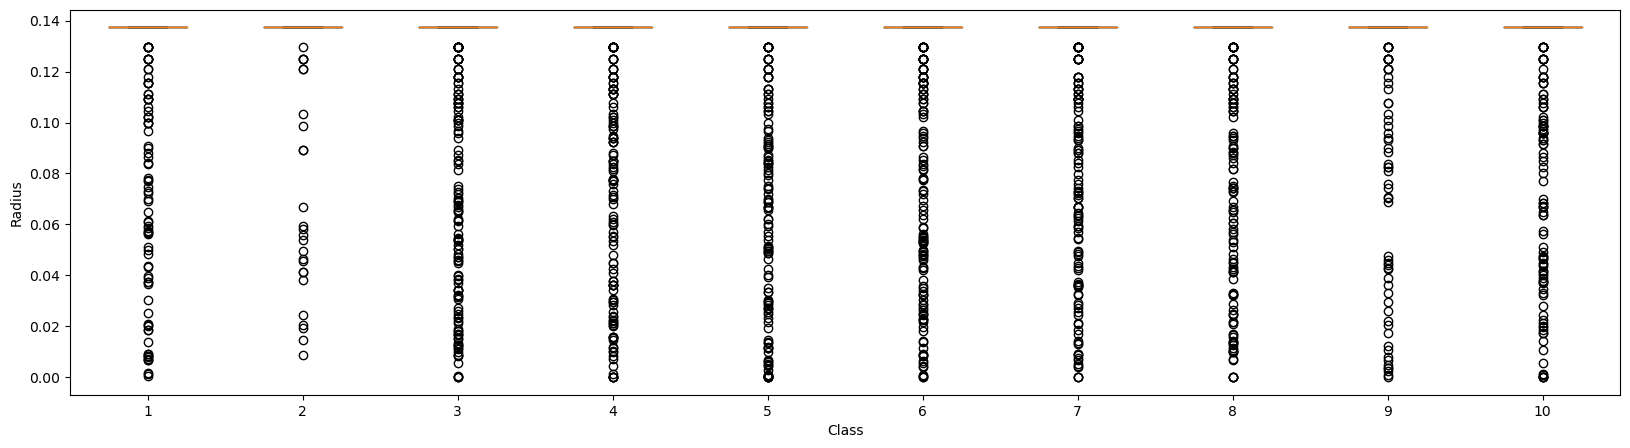

In [71]:
plt.figure(figsize=(20,5))
# plt.ylim([0,0.3])
plt.boxplot(fi)
plt.xlabel("Class")
plt.ylabel("Radius")
saved_path = f"plot/image/{name_session}/"
plt.savefig(f"{saved_path}/box_plot_scored_on_each_class_server_{round}.jpg")
# plt.clf()